<a href="https://colab.research.google.com/github/ZaqueMendes/Linguagem_Python/blob/main/11_10_CSAN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-datareader
!pip install --upgrade pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 22.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas_datareader as pdr
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')



In [ ]:
# Início e fim
#start = datetime.date(2015,1,1).isoformat()
#end = datetime.date(2022,8,27).isoformat()
start = '2021-09-08'
end = '2022-10-11'

In [ ]:
# Recupera dados
ativo = pdr.get_data_yahoo('CSAN3.SA', start=start, end=end)
ibov = pdr.get_data_yahoo('BOVA11.SA', start=start, end=end)

In [ ]:
ativo

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-08,22.290001,21.600000,22.200001,21.700001,9124900.0,20.431698
2021-09-09,22.350000,21.420000,21.700001,22.190001,6976700.0,20.893061
2021-09-10,22.570000,21.780001,22.389999,21.850000,6923100.0,20.572931
2021-09-13,22.930000,22.110001,22.299999,22.620001,7889800.0,21.297928
2021-09-14,23.650000,22.799999,22.799999,23.500000,13947400.0,22.126493
...,...,...,...,...,...,...
2022-10-05,18.400000,17.650000,18.299999,17.900000,10271900.0,17.900000
2022-10-06,18.379999,17.940001,18.110001,18.240000,8298500.0,18.240000
2022-10-07,18.270000,16.530001,18.209999,16.650000,53257600.0,16.650000


In [ ]:
!pip install plotly==4.14.3
!pip install "notebook>=5.3" "ipywidgets>=7.5"
import plotly.graph_objects as go


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.2 MB 26.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=45b7a31e5196ccfe08c857fae35e88cd34fb433686c03b7627a8d3a88d6cb116
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 19.1 MB/s 


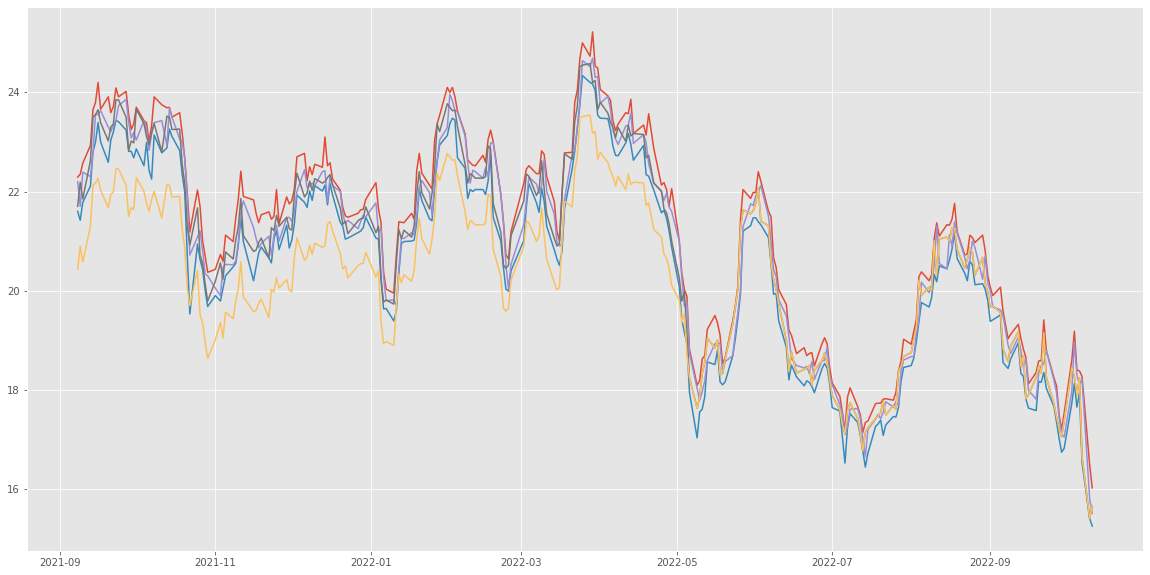

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ativo.loc[:,[col for col in ativo.columns if col != "Volume"]])

## Regressão Linear

Imagine a relação entre horas de estudos e resultado acadêmico.  
Quanto mais horas de estudo, melhor o resultado. Pode-se tentar estabelecer uma relação linear entre ambas variáveis.

In [ ]:
# Criação da coluna Var
ativo['var'] = ativo['Adj Close'].pct_change()
ativo = ativo.dropna()

ibov['var'] = ibov['Adj Close'].pct_change()
ibov = ibov.dropna()



In [ ]:
import statsmodels.api as sm
import numpy as np

Y = ativo['var']
X = ibov['var']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const   -0.000900
var      1.080998
dtype: float64

In [ ]:
ibov['var'].size

273

In [ ]:
ativo['var'].size

273

In [ ]:
ativo['var'].index.difference(ibov['var'].index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
# Eliminando as linhas estranhas
df = pd.concat(
    {'ibov':ibov['var'], 'ativo':ativo['var']},
    join='inner', # INNER VAI DESCARTAR OS DIAS EM QUE TEMOS UMA VARIÁVEL E NÃO A OUTRA
    axis=1
)

In [ ]:
df

,ibov,ativo
Date,,
2021-09-09,0.022277,0.022581
2021-09-10,-0.014618,-0.015322
2021-09-13,0.020386,0.035240
2021-09-14,-0.003746,0.038904
2021-09-15,-0.009132,0.002128
...,...,...
2022-10-05,0.008634,-0.020252
2022-10-06,0.001324,0.018994
2022-10-07,-0.006081,-0.087171


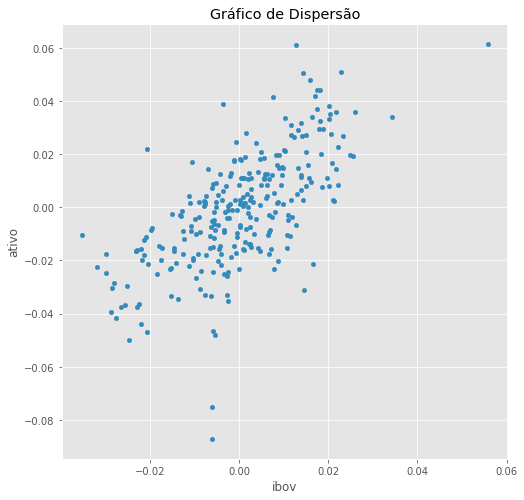

In [ ]:
df.plot.scatter('ibov','ativo', title = 'Gráfico de Dispersão' , figsize=(8,8))

In [ ]:
# Efetuando a regressão para o período)
import statsmodels.api as sm
import numpy as np

Y = df.ativo
X = df.ibov
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const   -0.000900
ibov     1.080998
dtype: float64

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

olsmod = sm.OLS(Y, X)
olsres = olsmod.fit()
print(olsres.summary())



                            OLS Regression Results                            
Dep. Variable:                  ativo   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.34e-36
Time:                        21:52:05   Log-Likelihood:                 739.03
No. Observations:                 273   AIC:                            -1474.
Df Residuals:                     271   BIC:                            -1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.918      0.3

Propriedades do coeficiente de correlação linear
 −1 ≤ r ≤ 1
 Se r ≈ 1 ⇒ correlação forte positiva.
 Se r ≈ −1 ⇒ correlação forte negativa.
 Se r ≈ 0 ⇒ não existe correlação linear.

https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

Na regressão existem dois tipos de variáveis, ou seja, variável dependente (também chamada de variável explicada) e variável independente (variável explicativa). 

A linha de regressão usada aqui é,

\hat{Y}_{i}=-3,2002+0,7529 X_{i}

A tabela de resumo da regressão é fornecida abaixo.

                                    Resultados de regressão OLS                            
        ================================================== ============================
        Departamento Variável: y R-quadrado: 0,669
        Modelo: OLS Adj. R ao quadrado: 0,667
        Método: Estatística F dos Mínimos Quadrados: 299,2
        Data: Seg, 01 de março de 2021 Prob (estatística F): 2.33e-37
        Hora: 16:19:34 Log-Probabilidade: -88.686
        Nº Observações: 150 AIC: 181,4
        Df Residuais: 148 BIC: 187,4
        Modelo Df: 1                                         
        Tipo de covariância: não robusto                                         
        ================================================== ============================
                         coef std err t P>|t| [0,025 0,975]
        -------------------------------------------------- ----------------------------
        const -3,2002 0,257 -12,458 0,000 -3,708 -2,693
        x1 0,7529 0,044 17,296 0,000 0,667 0,839
        ================================================== ============================
        Omnibus: 3.538 Durbin-Watson: 1.279
        Prob(Omnibus): 0,171 Jarque-Bera (JB): 3,589
        Inclinação: 0,357 Prob(JB): 0,166
        Curtose: 2.744 Cond. Nº 43.4
        ================================================== ============================
Variável dependente: Variável dependente é aquela que vai depender de outras variáveis. Nesta análise de regressão Y é nossa variável dependente porque queremos analisar o efeito de X em Y.

Modelo: O método dos Mínimos Quadrados Ordinários (OLS) é o modelo mais utilizado devido à sua eficiência. Este modelo fornece a melhor aproximação da linha de regressão populacional verdadeira. O princípio do OLS é minimizar o quadrado dos erros ( ∑e i 2 ).

Número de observações: O número de observações é o tamanho da nossa amostra, ou seja, N = 150.

Grau de liberdade (df) dos resíduos: 
Grau de liberdade é o número de observações independentes com base nas quais a soma dos quadrados é calculada.

Resíduos Df = 150 – (1+1) = 148

Grau de liberdade (Df) é calculado como,      

 Graus de liberdade,   D. f = N – K

Onde, N = tamanho da amostra (nº de observações) e   K = número de variáveis ​​+ 1

Df do modelo: 
Df do modelo = K – 1 = 2 – 1 = 1 ,

Onde, K = número de variáveis ​​+ 1



                   

Termo constante: Os termos constantes são a interseção da linha de regressão. Da linha de regressão (eq…1) o intercepto é -3,002. Na regressão omitimos algumas variáveis ​​independentes que não têm muito impacto na variável dependente, o intercepto informa o valor médio dessas variáveis ​​omitidas e ruídos presentes no modelo.

Termo do coeficiente: O termo do coeficiente informa a mudança em Y para uma mudança de unidade em X   , ou seja, se X aumenta em 1 unidade, então Y aumenta em 0,7529. Se você estiver familiarizado com as derivadas, poderá relacioná-las como a taxa de variação de Y em relação a X.

Erro padrão dos parâmetros: O erro padrão também é chamado de desvio padrão. O erro padrão mostra a variabilidade amostral desses parâmetros. O erro padrão é calculado por – 
 

Erro padrão do termo de interceptação (b1): 

se\left(b_{1}\right)=\sqrt{\left(\frac{\sum x_{i}^{2}}{n \sum\left(x_{i}-\bar{x}\ direito)^{2}}\direito) \sigma^{2}}

Erro padrão do termo do coeficiente (b2): 

se\left(b_{2}\right)=\sqrt{\frac{\sigma^{2}}{\sum\left(x_{i}-\bar{x}\right)}}

Aqui, σ 2 é o erro padrão de regressão (SER) . E σ 2 é igual a RSS( Residual Sum Of Square ie ∑e i 2 ).

  

t – estatísticas: 
Em teoria, assumimos que o termo de erro segue a distribuição normal e por isso os parâmetros b 1   e  b 2 também possuem distribuições normais com variância calculada na seção acima.

 Aquilo é , 

b 1  ∼ N(B 1 , σ b1 2 )
b 2    ∼ N(B 2 , σ b2 2 )
Aqui B 1 e B 2  são meios verdadeiros de b1 e b2.

t – as estatísticas são calculadas assumindo a seguinte hipótese – 

H 0  : B 2  = 0 (variável X não tem influência em Y)
H a  : B 2  ≠ 0 (X tem impacto significativo em Y)
Cálculos para t - estatísticas:          

                     t = (b 1 – B 1 ) / se (b 1 )

 Da tabela de resumo , b 1 = -3,2002 e se(b 1 ) = 0,257, Então,

                   t = (-3,2002 – 0) / 0,257 = -12,458

Da mesma forma, b 2 = 0,7529 , se(b 2 ) = 0,044

                   t = (0,7529 – 0) / 0,044 = 17,296

p – valores: 
Em teoria, lemos que o valor p é a probabilidade de obter a estatística t pelo menos tão contraditória a H 0  calculada a partir da suposição de que a hipótese nula é verdadeira. Na tabela de resumo, podemos ver que o valor P para ambos os parâmetros é igual a 0. Isso não é exatamente 0, mas como temos estatísticas muito maiores (-12,458 e 17,296), o valor p será aproximadamente 0.

Se você conhece os níveis de significância, pode ver que podemos rejeitar a hipótese nula em quase todos os níveis de significância.

Intervalos de confiança:
Existem muitas abordagens para testar a hipótese, incluindo a abordagem do valor-p mencionada acima. A abordagem do intervalo de confiança é uma delas. 5% é o nível de significância padrão (∝) no qual os C.Is são feitos. 

CI para B 1 é ( b 1 – t ∝/2 se(b 1 ), b 1 + t ∝/2 se(b 1 ) )

Como ∝ = 5%, b 1 = -3,2002, se(b 1 ) = 0,257 , da tabela t , t 0,025,148 = 1,655,

Depois de colocar os valores, o CI para B 1 é de aprox. (-3,708, -2,693). O mesmo pode ser feito para b 2 também.

Ao calcular os valores de p, rejeitamos a hipótese nula, podemos ver o mesmo em CI também. Como 0 não está em nenhum dos intervalos, rejeitaremos a hipótese nula. 



 R – valor ao quadrado: 
R 2 é o coeficiente de determinação que nos diz quanto de variação percentual da variável independente pode ser explicada pela variável independente. Aqui, a variação de 66,9% em Y pode ser explicada por X. O valor máximo possível de R 2   pode ser 1, significa que quanto maior o valor de R 2  melhor a regressão.

F – estatística: 
O teste F informa a qualidade do ajuste de uma regressão. O teste é semelhante ao teste t ou outros testes que fazemos para a hipótese. A estatística F - é calculada como abaixo -                    

F=\frac{R^{2} /(k-1)}{\left(1-R^{2}\right) /(nk)}

Inserindo os valores de R 2 , nek, F = (0,669/1) / (0,331/148) = 229,12.

Você pode calcular a probabilidade de F > 229,1 para 1 e 148 df, que chega a aprox. 0. A partir disso, rejeitamos novamente a hipótese nula declarada acima. 

Os demais termos não são usados ​​com frequência. Termos como Skewness e Kurtosis falam sobre a distribuição de dados. A assimetria e a curtose para a distribuição normal são 0 e 3, respectivamente. O teste Jarque-Bera é usado para verificar se um erro tem distribuição normal ou não.  

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ativo   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.34e-36
Time:                        21:52:05   Log-Likelihood:                 739.03
No. Observations:                 273   AIC:                            -1474.
Df Residuals:                     271   BIC:                            -1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -0.918      0.360      -0.003       0.001
ibov           1.0810      0.073     14.764      0.000       0.937       1.225
==============================================================================
Omnibus:                       39.895   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.980
Skew:                          -0.645   Prob(JB):                     2.16e-24
Kurtosis:                       5.813   Cond. No.                         74.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Regressão em janela móvel
# Para isso, usaremos a fórmula de beta (covariancia sobre variancia)

def calc_beta(df):
    np_array = df.values
    m = np_array[:,0]
    s = np_array[:,1]

    covariance = np.cov(s,m)
    beta = covariance[0,1]/covariance[1,1]
    return beta


# Cálculo para período total bate com o da regressão do statsmodels
calc_beta(df)

1.080997853215159

In [ ]:
# Janela que percorre o dataframe

def rolling_apply(df, period, func, min_periods=None):
    if min_periods is None:
        min_periods = period
    result = pd.Series(np.nan, index=df.index)

    for i in range(1, len(df)+1):
        sub_df = df.iloc[max(i-period, 0):i,:] 
        if len(sub_df) >= min_periods:
            idx = sub_df.index[-1]
            result[idx] = func(sub_df)
    return result




df['beta'] = np.nan
period = 252
beta = rolling_apply(df[['ibov','ativo']], period, calc_beta, min_periods = period)  
beta.name = 'beta'
df.update(beta)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#import numpy as np  


In [ ]:
# Carrega o arquivo csv para um pandas dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/ZaqueMendes/Quant/main/CSAN3.SA.csv')


# Converte o campo Date de string para o formato datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Mostra a tabela do Ativo
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-11,23.430000,23.750000,22.780001,22.799999,21.467407,11854400
1,2021-10-13,22.930000,23.690001,22.879999,23.520000,22.145325,7844000
2,2021-10-14,23.690001,23.700001,23.260000,23.500000,22.126493,3525600
3,2021-10-15,23.500000,23.500000,23.110001,23.250000,21.891106,7800300
4,2021-10-18,23.059999,23.590000,22.830000,23.260000,21.900520,3406900
...,...,...,...,...,...,...,...
245,2022-10-04,18.969999,19.180000,18.129999,18.270000,18.270000,5786600
246,2022-10-05,18.299999,18.400000,17.650000,17.900000,17.900000,10271900
247,2022-10-06,18.110001,18.379999,17.940001,18.240000,18.240000,8298500
248,2022-10-07,18.209999,18.270000,16.530001,16.650000,16.650000,53257600


In [ ]:
# Separa Valores lidos, e valor a ser previsto
atributos = ['Open', 'High', 'Low', 'Volume']
# Variável a ser prevista
atrib_prev = ['Adj Close']
# Criando objetos
x = dataset[atributos].values
y = dataset[atrib_prev].values

# Divide 75% dos dados aleatoriamente para treino e o restante para teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, random_state=42)

##Treinamento da máquina
# Modelo de regressão linear
modelo = LinearRegression()
# Treina o modelo
modelo.fit(X_treino, y_treino)


# Predizer 21 resultados

predicao = (modelo.predict(X_teste[:21]))




#print(modelo.predict(X_teste[:21]))

print(predicao)

mediapredicao = sum(predicao) / len(predicao)


#print("A média é =",sum(predicao) / len(predicao));

print("A média é =", mediapredicao);


# Validando o modelo
# usando mean_squared_error
RMSE = mean_squared_error(y_teste, modelo.predict(X_teste))**0.5
print("Média de erro {0}".format(RMSE))

pontoentrada = mediapredicao - (RMSE*10)

stop = (RMSE / mediapredicao)* 100

gainparcial = mediapredicao -  RMSE

#Media - Erro  =  Entrada
print("O ponto de entrada é comprar abaixo de: ", pontoentrada)
print("O percentual de stop é de (%) : ", stop)
print("O percentual de Gain é de (%) : ", 2 * stop)

print("O objetivo da operação é: ", gainparcial)

[[17.91605039]
 [21.20290696]
 [21.43839277]
 [19.2678926 ]
 [23.20257466]
 [17.4162364 ]
 [18.17744785]
 [17.96629614]
 [20.82571368]
 [20.25907599]
 [18.62746214]
 [19.97858886]
 [18.27002231]
 [17.6718477 ]
 [21.13243907]
 [19.30845753]
 [17.60749411]
 [19.85862723]
 [18.51245371]
 [20.26280539]
 [18.18763798]]
A média é = [19.38525826]
Média de erro 0.4139871001125027
O ponto de entrada é comprar abaixo de:  [15.24538726]
O percentual de stop é de (%) :  [2.13557691]
O percentual de Gain é de (%) :  [4.27115383]
O objetivo da operação é:  [18.97127116]


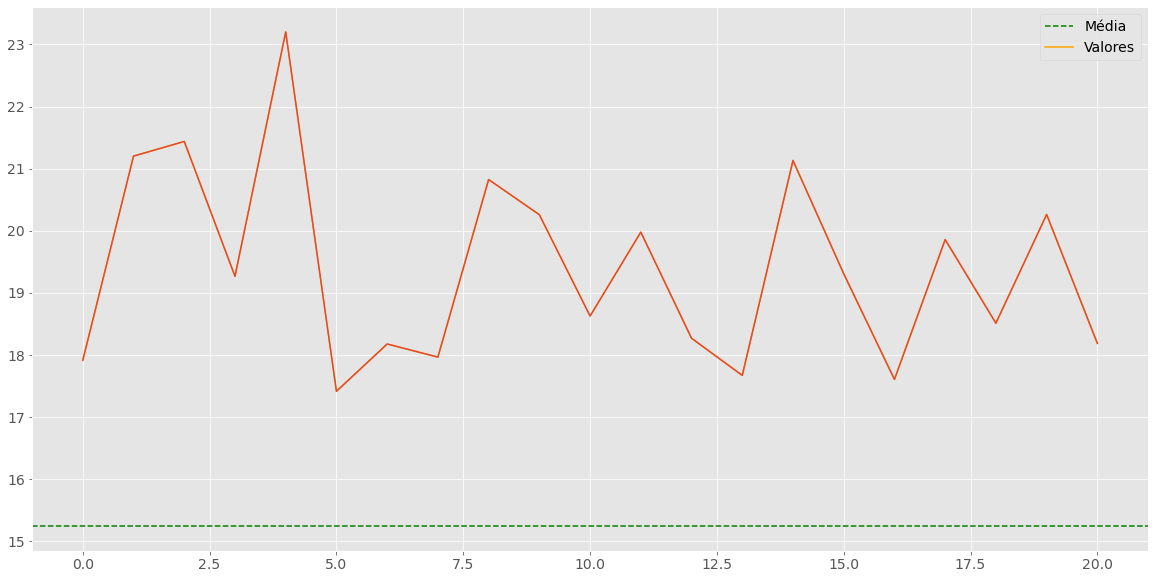

In [ ]:
#Grafico de 21 Pregões com as predições
#Testar entrada abaixo da mínima da média do período Linha Verde




plt.figure(figsize=(20,10))

plt.axhline(y = pontoentrada, color = 'g', linestyle = '--', label = 'Média') 


plt.plot(predicao, color = 'orange',  label ='Valores')
# plt.plot(x, label ='Pregões')

plt.legend()


plt.plot(predicao)

Entrada:

xx/xx/22  -  Qtde  2000  -  Valor  xxxxx

In [ ]:
date_1 = "11-10-2022"
qtde_compra = 2000
valor_ativo = 15.40
vpa = 8.37
lpa = 2.63


valuation = math.sqrt(22.5 * lpa * vpa )
valor_total = (qtde_compra * valor_ativo)
print("Compra de ", qtde_compra, " ações da CSAN por R$ " , valor_total, " em " , date_1)
print("Alvo por ação = Valuation = " , valuation)

NameError: ignored